https://sites.google.com/view/vinegarhill-financelabs/analytical-american-options

https://medium.com/@jbohne822/analytical-approximations-for-american-options-bdf3ef984a4a  
https://www.deriscope.com/docs/Barone_Adesi_Whaley_1987.pdf  
https://www.deriscope.com/docs/Ju_1999.pdf  
https://assets.pubpub.org/or0zyxly/21654278914381.pdf  
https://zhuanlan.zhihu.com/p/30491973  
https://zhuanlan.zhihu.com/p/545143586  
file:///Users/xuhanjia/Desktop/%E3%80%90%E6%9C%9F%E6%9D%83%E4%B8%93%E9%A2%98%E3%80%91%E7%BE%8E%E5%BC%8F%E6%9C%9F%E6%9D%83%E5%AE%9A%E4%BB%B7%EF%BC%9ABarone-Adesi-Whaley%E5%AE%9A%E4%BB%B7%E6%A8%A1%E5%9E%8B.pdf

http://www.tb18.net/futures/article/pdfdown/101239.html   

https://zhuanlan.zhihu.com/p/27092221    

https://zhuanlan.zhihu.com/p/38942386



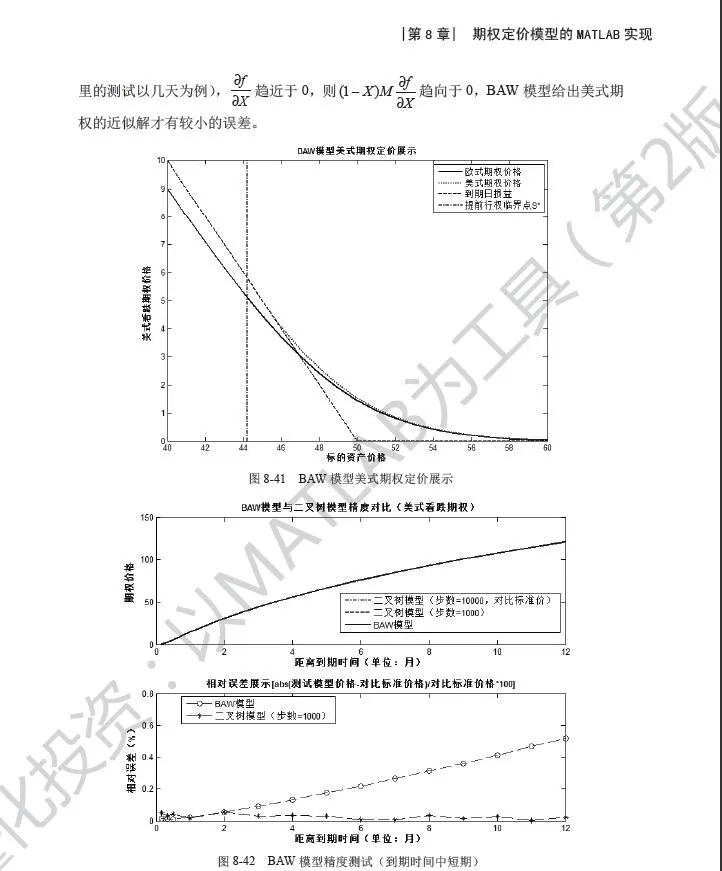

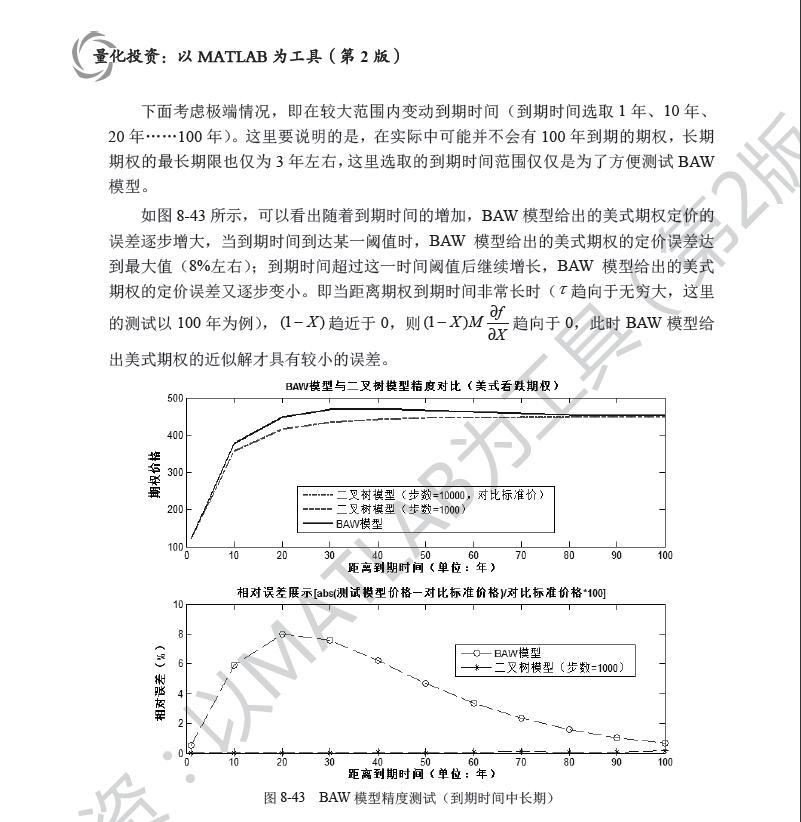

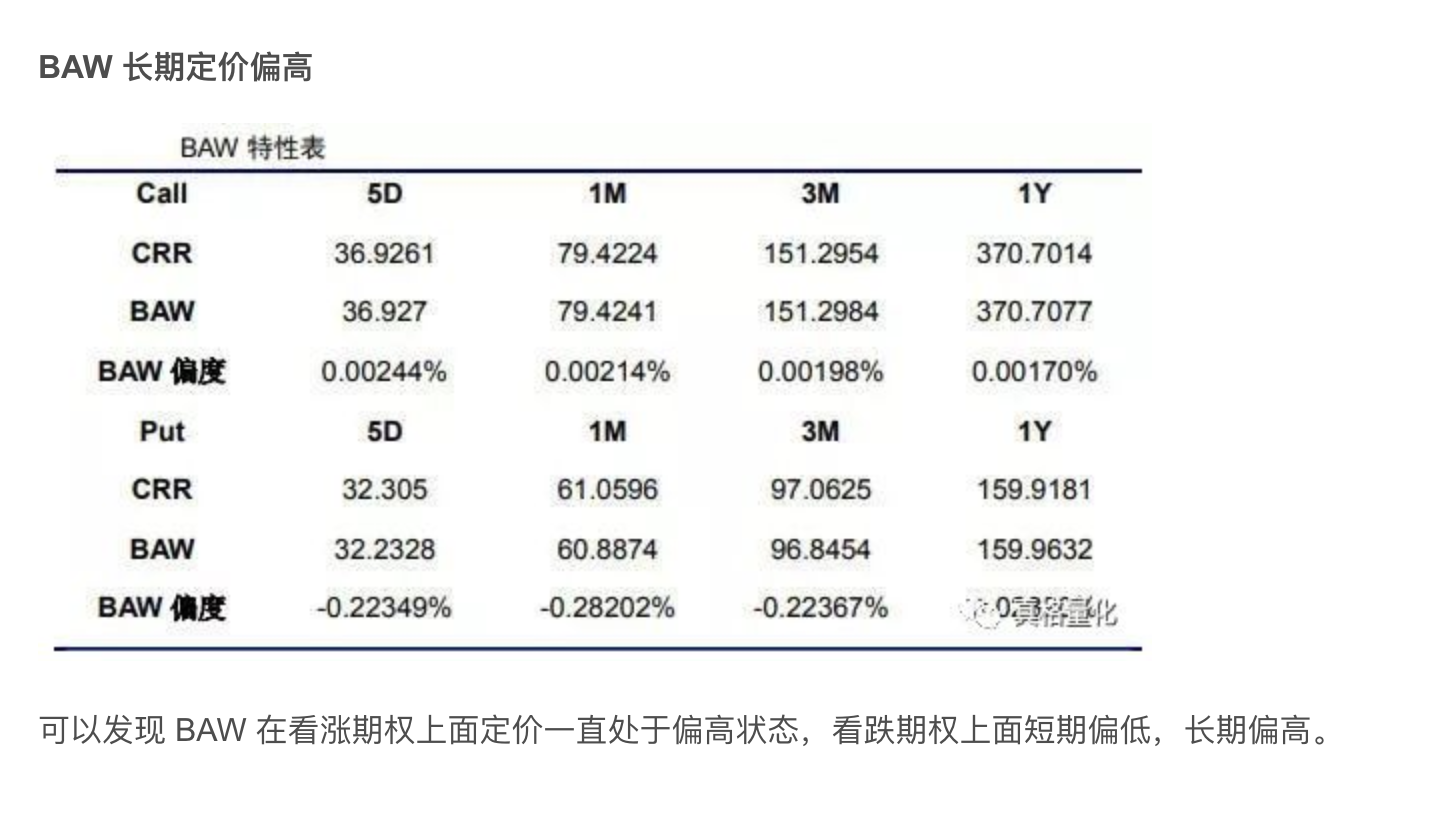

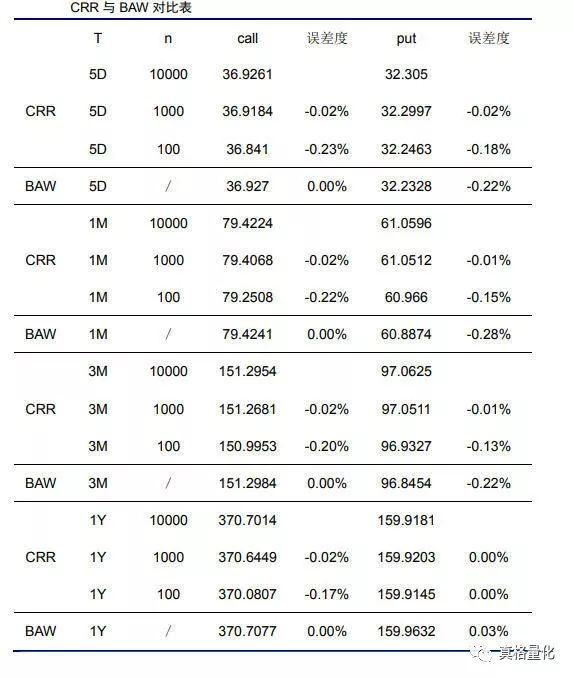

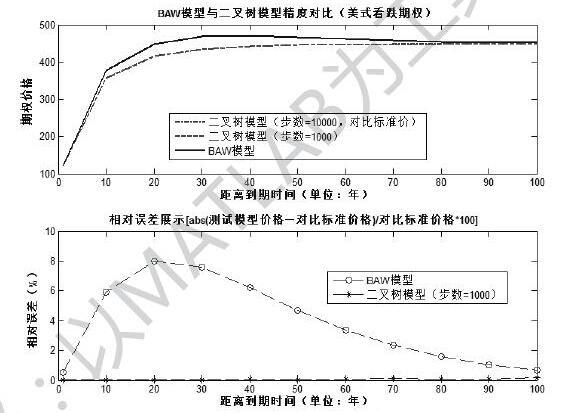

# BJS

In [ ]:
from scipy.stats import norm
import numpy as np

def black_scholes_call(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    call_price = S * N_d1 - K * np.exp(-r * T) * N_d2
    return call_price

import numpy as np
from scipy.stats import norm

def bjerksund_stensland(S, K, r, q, T, sigma, is_call=True):
    """
    Computes the price of an American option using the Bjerksund-Stensland model.

    Parameters:
    S (float):      the current stock price
    K (float):      the strike price of the option
    r (float):      the risk-free interest rate
    q (float):      the continuous dividend yield
    T (float):      the time to maturity of the option (in years)
    sigma (float):  the annualized volatility of the stock returns
    is_call (bool): whether the option is a call option (True) or a put option (False)

    Returns:
    float: the price of the American option
    """
    # Check if any input values are non-positive or zero
    if S <= 0 or K <= 0 or T <= 0 or sigma <= 0:
        return np.nan

    # Calculate the parameters of the Bjerksund-Stensland model
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    beta = (0.5 - (r - q) / sigma**2) + np.sqrt((r - q)**2 / sigma**4 + 2 * r / sigma**2)
    B = beta / (beta - 1) * K
    B1 = np.log(B**2 / (S * K)) / (sigma * np.sqrt(T)) + (r - q + beta * sigma) * T / (beta * sigma)
    B2 = np.log(B**2 / (S * K)) / (sigma * np.sqrt(T)) + (r - q - beta * sigma) * T / (beta * sigma)
    A1 = (r - q + beta * sigma) / 2
    A2 = (r - q - beta * sigma) / 2

    # Calculate the early exercise boundary
    if is_call:
        K_star = B - (B - K) * np.exp(A2 * T) if S >= B else \
                 K if S <= K else \
                 B - (B - K) * (S / B)**A1 * np.exp(-B1 * T)
    else:
        K_star = B + (K - B) * np.exp(A2 * T) if S <= B else \
                 K if S >= K else \
                 B + (K - B) * (S / B)**A1 * np.exp(-B1 * T)

    # Calculate the option price
    if S >= K_star:
        if is_call:
            return S - K
        else:
            return K - S
    else:
        h1 = (np.log(S / K_star) + B1 * T) / (sigma * np.sqrt(T))
        h2 = (np.log(S / K_star) + B2 * T) / (sigma * np.sqrt(T))
        if is_call:
            return S * norm.cdf(d1) - K * norm.cdf(d2) + (K - K_star) * np.exp(-r * T) * norm.cdf(h1) - \
                   (S - K_star) * np.exp(-q * T) * norm.cdf(h2)
        else:
            return K * norm.cdf(-d2) - S * norm.cdf(-d1) + (K_star - K) * np.exp(-r * T) * norm.cdf(-h1) - \
                   (K_star - S) * np.exp(-q * T) * norm.cdf(-h2)
                   

In [ ]:
import numpy as np
from scipy.stats import norm, mvn
import pandas as pd
from math import isnan


def BlackScholes(S, K, T, r, sigma, div, opt):
    """
    Returns option price using Black-Scholes model

    :param S: Spot price (0.0-30000.0)
    :param K: Strike price (0.0-30000.0)
    :param T: Time to expiry (0.0-5.0)
    :param r: Risk-free rate (0.0-0.2)
    :param sigma: Volatility (0.0-1.5)
    :param Opt: Option type ('c' or 'p')
    :return: Option price (0.0-30000.0)
    """
    d1 = (np.log(S / K) + (r - div + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    pv = np.where(opt == 'c',
                  S * np.exp(-div * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2),
                  K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-div * T) * norm.cdf(-d1))
    return pv

# TODO: maybe this is class
def BjerksundStensland(S, K, T, r, sigma, div, opt):
    """
    Returns option price using Bjerksund-Stensland model

    :param S: Spot price (0.0-30000.0)
    :param K: Strike price (0.0-30000.0)
    :param T: Time to expiry (0.0-5.0)
    :param r: Risk-free rate (0.0-0.2)
    :param sigma: Volatility (0.0-1.5)
    :param div: Dividend yield (0.0-1.5)
    :param Opt: Option type ('c' or 'p')
    :return: Option price (0.0-30000.0)
    """
    S_df = S
    K_df = K
    T_df = T
    r_df = r
    sigma_df = sigma
    div_df = div
    opt_df = opt
    BjerksundValue = pd.DataFrame(pd.np.empty((S_df.shape[0], 1)))
    for i in range(S_df.shape[0]):
        S = S_df[i]
        K = K_df[i]
        T = T_df[i]
        r = r_df[i]
        sigma = sigma_df[i]
        div = div_df[i]
        opt = opt_df[i]

        b = r - div

        if opt == 'p':
            S, K = K, S
            div = r
            r = r - b
            b = r - div

        if b >= r:
            pv =  BlackScholes(S, K, T, r, sigma, div, opt)

        else:
            beta = (1 / 2) - (b / (sigma ** 2)) + np.sqrt((b / (sigma ** 2) - (1 / 2)) ** 2 + 2 * r / sigma ** 2)

            def alpha(X):
                return (X - K) * X ** -beta

            B0 = np.maximum(K, (r / (r - b)) * K)
            BInf = (beta / (beta - 1)) * K

            def h(T):
                return -(b * T + 2 * sigma * np.sqrt(T)) * (K ** 2 / ((BInf - B0) * B0))

            def X(T):
                return B0 + (BInf - B0) * (1 - np.exp(h(T)))

            def phi(S, T, gamma, H, X):
                d1 = -(np.log(S / H) + (b + (gamma - 0.5) * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
                d2 = -(np.log(X ** 2 / (S * H)) + (b + (gamma - 0.5) * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
                lamb = -r + gamma * b + 0.5 * gamma * (gamma - 1) * (sigma ** 2)
                kappa = (2 * b) / (sigma ** 2) + (2 * gamma - 1)
                return np.exp(lamb * T) * (S ** gamma) * (norm.cdf(d1) - ((X / S) ** kappa) * norm.cdf(d2))

            # Taken from dedwards25/Python_Option_Pricing
            def _cbnd(a, b, rho):
                # This distribution uses the Genz multi-variate normal distribution
                # code found as part of the standard SciPy distribution
                lower = np.array([0, 0])
                upper = np.array([a, b])
                infin = np.array([0, 0])
                correl = rho
                error, value, inform = mvn.mvndst(lower, upper, infin, correl)
                return value

            def psi(S, big_T, gamma, H, big_X, small_X, small_T):
                lamb = -r + gamma * b + 0.5 * gamma * (gamma - 1) * (sigma ** 2)
                kappa = 2 * b / (sigma ** 2) + (2 * gamma - 1)

                small_d1 = -(np.log(S / small_X) + (b + (gamma - 0.5) * (sigma ** 2)) * small_T) / (sigma * np.sqrt(small_T))
                small_d2 = -(np.log((big_X ** 2) / (S * small_X)) + (b + (gamma - 0.5) * (sigma ** 2)) * small_T) / (sigma * np.sqrt(small_T))
                small_d3 = -(np.log(S / small_X) - (b + (gamma - 0.5) * (sigma ** 2)) * small_T) / (sigma * np.sqrt(small_T))
                small_d4 = -(np.log((big_X ** 2) / (S * small_X)) - (b + (gamma - 0.5) * (sigma ** 2)) * small_T) / (sigma * np.sqrt(small_T))
                big_d1   = -(np.log(S / H) + (b + (gamma - 0.5) * (sigma ** 2)) * big_T) / (sigma * np.sqrt(big_T))
                big_d2   = -(np.log((big_X ** 2) / (S * H)) + (b + (gamma - 0.5) * (sigma ** 2)) * big_T) / (sigma * np.sqrt(big_T))
                big_d3   = -(np.log((small_X ** 2) / (S * H)) + (b + (gamma - 0.5) * (sigma ** 2)) * big_T) / (sigma * np.sqrt(big_T))
                big_d4   = -(np.log((S * (small_X ** 2) / (H * (big_X ** 2)))) + (b + (gamma - 0.5) * (sigma ** 2)) * big_T) / (sigma * np.sqrt(big_T))

                return np.exp(lamb * big_T) * (S ** gamma) * (_cbnd(small_d1, big_d1, np.sqrt(small_T / big_T))
                                                              - (((big_X / S) ** kappa) * _cbnd(small_d2, big_d2, np.sqrt(small_T / big_T)))
                                                              - ((small_X / S) ** kappa) * _cbnd(small_d3, big_d3, -np.sqrt(small_T / big_T))
                                                              + ((small_X / big_X) ** kappa) * _cbnd(small_d4, big_d4, -np.sqrt(small_T / big_T)))

            big_T = T
            small_T = 0.5 * (np.sqrt(5) - 1) * big_T
            big_X = X(big_T)
            small_X = X(big_T - small_T)

            if S >= big_X:
                pv = S - K

            else:
                pv = alpha(big_X) * (S ** beta) \
                     - alpha(big_X) * phi(S, small_T, beta, big_X, big_X) \
                     + phi(S, small_T, 1.0, big_X, big_X) \
                     - phi(S, small_T, 1.0, small_X, big_X) \
                     - K * phi(S, small_T, 0.0, big_X, big_X) \
                     + K * phi(S, small_T, 0.0, small_X, big_X) \
                     + alpha(small_X) * phi(S, small_T, beta, small_X, big_X) \
                     - alpha(small_X) * psi(S, big_T, beta, small_X, big_X, small_X, small_T) \
                     + psi(S, big_T, 1.0, small_X, big_X, small_X, small_T) \
                     - psi(S, T, 1.0, K, big_X, small_X, small_T) \
                     - K * psi(S, big_T, 0.0, small_X, big_X, small_X, small_T) \
                     + K * psi(S, big_T, 0.0, K, big_X, small_X, small_T)

        if isnan(pv):
            pv = 0.0

        blsprice = BlackScholes(S, K, T, r, sigma, div, opt)
        if pv < blsprice:
            pv = blsprice

        BjerksundValue.loc[i] = pv


    return BjerksundValue

def BinomialTree(S, K, T, r, sigma, div, opt, N):
    """
    Returns option price using Binomial model and Broaie-Dutemple convergence

    :param S: Spot price (0.0-30000.0)
    :param K: Strike price (0.0-30000.0)
    :param T: Time to expiry (0.0-5.0)
    :param r: Risk-free rate (0.0-0.2)
    :param sigma: Volatility (0.0-1.5)
    :param Opt: Option type ('c' or 'p')
    :param N: Number of steps in tree (0-3000)
    :return: Option price (0.0-30000.0)
    """
    BinomialValue = pd.DataFrame(pd.np.zeros((S.shape[0], 1)))
    for h in range(S.shape[0]):
        At = T[h] / N
        u = np.exp((sigma[h]) * np.sqrt(At))
        d = 1. / u
        p = (np.exp((r[h] - div[h]) * At) - d) / (u - d)

        # Binomial price tree
        stockvalue = np.zeros((N + 1, N + 1))
        stockvalue[0, 0] = S[h]
        for i in range(1, N + 1):
            stockvalue[i, 0] = stockvalue[i - 1, 0] * u
            for j in range(1, i + 1):
                stockvalue[i, j] = stockvalue[i - 1, j - 1] * d

        # option value at final node
        optionvalue = np.zeros((N + 1, N + 1))
        for j in range(N + 1):
            if opt[h] == "c":  # Call
                optionvalue[N, j] = max(0, stockvalue[N, j] - K[h])
            elif opt[h] == "p":  # Put
                optionvalue[N, j] = max(0, K[h] - stockvalue[N  , j])

        # backward calculation for option price
        for i in range(N - 1, -1, -1):
            for j in range(i + 1):
                if opt[h] == "p":
                    optionvalue[i, j] = max(0, K[h] - stockvalue[i, j], np.exp(-r[h] * At) * (
                            p * optionvalue[i + 1, j] + (1 - p) * optionvalue[i + 1, j + 1]))
                elif opt[h] == "c":
                    optionvalue[i, j] = max(0, stockvalue[i, j] - K[h], np.exp(-r[h] * At) * (
                            p * optionvalue[i + 1, j] + (1 - p) * optionvalue[i + 1, j + 1]))

        blsprice = BlackScholes(S[h], K[h], T[h], r[h], sigma[h], div[h], opt[h])
        if optionvalue[0, 0] < blsprice:
            optionvalue[0, 0] = blsprice
        BinomialValue.loc[h] = optionvalue[0, 0]
        if h % 1000 == 0:
            print(h)
    return BinomialValue


def NeuralNetwork(S, K, T, r, sigma, Opt, model):
    """
    Returns option price using Neural network

    :param S: Spot price (0.0-30000.0)
    :param K: Strike price (0.0-30000.0)
    :param T: Time to expiry (0.0-5.0)
    :param r: Risk-free rate (0.0-0.2)
    :param sigma: Volatility (0.0-1.5)
    :param Opt: Option type ('c' or 'p')
    :param model: Neural network model
    :return: Option price (0.0-30000.0)
    """

In [ ]:
from math import * 

# Cumulative standard normal distribution
def cdf(x):
    return (1.0 + erf(x / sqrt(2.0))) / 2.0

# Intermediate calculation used by both the Bjerksund Stensland 1993 and 2002 approximations
def phi(s, t, gamma, h, i, r, a, v):
    lambda1 = (-r + gamma * a + 0.5 * gamma * (gamma - 1) * v**2) * t
    dd = -(log(s / h) + (a + (gamma - 0.5) * v**2) * t) / (v * sqrt(t))
    k = 2 * a / (v**2) + (2 * gamma - 1)

    try:
        return exp(lambda1) * s**gamma * (cdf(dd) - (i / s)**k * cdf(dd - 2 * log(i / s) / (v * sqrt(t))))
    except OverflowError as err:
        return exp(lambda1) * s**gamma * cdf(dd)

# Call Price based on Bjerksund/Stensland Model
# Parameters
#   underlying_price: Price of underlying asset
#   exercise_price: Exercise price of the option
#   time_in_years: Time to expiration in years (ie. 33 days to expiration is 33/365)
#   risk_free_rate: Risk free rate (ie. 2% is 0.02)
#   volatility: Volatility percentage (ie. 30% volatility is 0.30)
def bjerksund_stensland_call(underlying_price, exercise_price, time_in_years, risk_free_rate, volatility):
    div = 1e-08
    z = 1
    rr = risk_free_rate
    dd2 = div
    
    dt = volatility * sqrt(time_in_years)
    drift = risk_free_rate - div
    v2 = volatility**2
    
    b1 = sqrt((z * drift / v2 - 0.5)**2 + 2 * rr / v2)
    beta = (1 / 2 - z * drift / v2) + b1
    binfinity = beta / (beta - 1) * exercise_price
    bb = max(exercise_price, rr / dd2 * exercise_price)
    ht = -(z * drift * time_in_years + 2 * dt) * bb / (binfinity - bb)
    i = bb + (binfinity - bb) * (1 - exp(ht))

    if underlying_price < i and beta < 100:
        alpha = (i - exercise_price) * i**(-beta)
        return alpha * underlying_price**beta - alpha * phi(underlying_price, time_in_years, beta, i, i, rr, z * drift, volatility) + phi(underlying_price, time_in_years, 1, i, i, rr, z * drift, volatility) - phi(underlying_price, time_in_years, 1, exercise_price, i, rr, z * drift, volatility) - exercise_price * phi(underlying_price, time_in_years, 0, i, i, rr, z * drift, volatility) + exercise_price * phi(underlying_price, time_in_years, 0, exercise_price, i, rr, z * drift, volatility)
    
    return underlying_price - exercise_price

# Put Price based on Bjerksund/Stensland Model
# Parameters
#   underlying_price: Price of underlying asset
#   exercise_price: Exercise price of the option
#   time_in_years: Time to expiration in years (ie. 33 days to expiration is 33/365)
#   risk_free_rate: Risk free rate (ie. 2% is 0.02)
#   volatility: Volatility percentage (ie. 30% volatility is 0.30)
def bjerksund_stensland_put(underlying_price, exercise_price, time_in_years, risk_free_rate, volatility):
    div = 1E-08
    z = -1
    rr = div
    dd = rr
    dd2 = 2 * dd - rr
    asset_new = underlying_price
    underlying_price = exercise_price
    exercise_price = asset_new

    dt = volatility * sqrt(time_in_years)
    drift = risk_free_rate - div
    v2 = volatility**2

    b1 = sqrt((z * drift / v2 - 0.5)**2 + 2 * rr / v2)
    beta = (1 / 2 - z * drift / v2) + b1
    binfinity = beta / (beta - 1) * exercise_price
    bb = max(exercise_price, rr / dd2 * exercise_price)
    ht = -(z * drift * time_in_years + 2 * dt) * bb / (binfinity - bb)
    i = bb + (binfinity - bb) * (1 - exp(ht))
        
    if underlying_price < i and beta < 100: # To avoid overflow
        alpha = (i - exercise_price) * i**(-beta)
        return alpha * underlying_price**beta - alpha * phi(underlying_price, time_in_years, beta, i, i, rr, z * drift, volatility) + phi(underlying_price, time_in_years, 1, i, i, rr, z * drift, volatility) - phi(underlying_price, time_in_years, 1, exercise_price, i, rr, z * drift, volatility) - exercise_price * phi(underlying_price, time_in_years, 0, i, i, rr, z * drift, volatility) + exercise_price * phi(underlying_price, time_in_years, 0, exercise_price, i, rr, z * drift, volatility)
    
    return underlying_price - exercise_price    

# Call Implied Volatility
# Parameters
#   underlying_price: Price of underlying asset
#   exercise_price: Exercise price of the option
#   time_in_years: Time to expiration in years (ie. 33 days to expiration is 33/365)
#   risk_free_rate: Risk free rate (ie. 2% is 0.02)
#   option_price: It is the market price of the option
def implied_volatility_call(underlying_price, exercise_price, time_in_years, risk_free_rate, option_price):
    high = 5
    low = 0

    while (high - low) > 0.0001:
        if bjerksund_stensland_call(underlying_price, exercise_price, time_in_years, risk_free_rate, (high + low) / 2) > option_price:
            high = (high + low) / 2
        else:
            low = (high + low) / 2
    
    return (high + low) / 2

# Put Implied Volatility
# Parameters
#   underlying_price: Price of underlying asset
#   exercise_price: Exercise price of the option
#   time_in_years: Time to expiration in years (ie. 33 days to expiration is 33/365)
#   risk_free_rate: Risk free rate (ie. 2% is 0.02)
#   option_price: It is the market price of the option
def implied_volatility_put(underlying_price, exercise_price, time_in_years, risk_free_rate, option_price):
    high = 5
    low = 0
    
    while (high - low) > 0.0001:
        if bjerksund_stensland_put(underlying_price, exercise_price, time_in_years, risk_free_rate, (high + low) / 2) > option_price:
            high = (high + low) / 2
        else:
            low = (high + low) / 2
    
    return (high + low) / 2

# BAW

In [ ]:
"""
BAW.PY
Implements the Barone-Adesi And Whaley model for the valuation of American options and their greeks. 
"""

import numpy as _np
import cmath as _cm

# Option Styles
_AMERICAN = 'American'
_EUROPEAN = 'European'
# Option Types 
_CALL = 'Call'
_PUT = 'Put'
# Output Types 
_VALUE = 'Value'
_DELTA = 'Delta'
_GAMMA = 'Gamma'
_VEGA = 'Vega'
_THETA = 'Theta'

_dS = 0.001
_dT = 1 / 365
_dV = 0.00001

_ITERATION_MAX_ERROR = 0.001

def _standardNormalPDF(x): 
    val = (1 / (2 * _cm.pi)**0.5) * _np.exp(-1 * (x**2) / 2)
    return val
def _standardNormalCDF(X):     
    y = _np.abs(X) 
    
    if y > 37: 
        return 0
    else:
        Exponential = _np.exp(-1 * (y**2) / 2)
        
    if y < 7.07106781186547:
        SumA = 0.0352624965998911 * y + 0.700383064443688
        SumA = SumA * y + 6.37396220353165
        SumA = SumA * y + 33.912866078383
        SumA = SumA * y + 112.079291497871
        SumA = SumA * y + 221.213596169931
        SumA = SumA * y + 220.206867912376
        SumB = 0.0883883476483184 * y + 1.75566716318264
        SumB = SumB * y + 16.064177579207
        SumB = SumB * y + 86.7807322029461
        SumB = SumB * y + 296.564248779674
        SumB = SumB * y + 637.333633378831
        SumB = SumB * y + 793.826512519948
        SumB = SumB * y + 440.413735824752
        _standardNormalCDF = Exponential * SumA / SumB
    else:
        SumA = y + 0.65
        SumA = y + 4 / SumA
        SumA = y + 3 / SumA
        SumA = y + 2 / SumA
        SumA = y + 1 / SumA
        _standardNormalCDF = Exponential / (SumA * 2.506628274631)
    
    if X > 0:
         return 1 - _standardNormalCDF
    else: 
         return _standardNormalCDF
        
def _priceEuropeanOption(option_type_flag, S, X, T, r, b, v):
    '''
    Black-Scholes
    '''

    d1 = (_np.log(S / X) + (b + v**2 / 2) * T) / (v * (T)**0.5)
    d2 = d1 - v * (T)**0.5

    if option_type_flag == 'Call':
        bsp = S * _np.exp((b - r) * T) * _standardNormalCDF(d1) - X * _np.exp(-r * T) * _standardNormalCDF(d2)
    else:
        bsp = X * _np.exp(-r * T) * _standardNormalCDF(-d2) - S * _np.exp((b - r) * T) * _standardNormalCDF(-d1)
        
    return bsp

def _priceAmericanOption(option_type_flag, S, X, T, r, b, v):
    '''
    Barone-Adesi-Whaley
    '''
    
    if option_type_flag == 'Call':
        return _approximateAmericanCall(S, X, T, r, b, v)
    elif option_type_flag == 'Put':
        return _approximateAmericanPut(S, X, T, r, b, v)
def _approximateAmericanCall(S, X, T, r, b, v):
    '''
    Barone-Adesi And Whaley
    '''

    if b >= r:
        return _priceEuropeanOption('Call', S, X, T, r, b, v)
    else:
        Sk = _Kc(X, T, r, b, v)
        N = 2 * b / v**2                                           
        k = 2 * r / (v**2 * (1 - _np.exp(-1 * r * T)))
        d1 = (_np.log(Sk / X) + (b + (v**2) / 2) * T) / (v * (T**0.5))
        Q2 = (-1 * (N - 1) + ((N - 1)**2 + 4 * k))**0.5 / 2
        a2 = (Sk / Q2) * (1 - _np.exp((b - r) * T) * _standardNormalCDF(d1))
        if S < Sk:
            return _priceEuropeanOption('Call', S, X, T, r, b, v) + a2 * (S / Sk)**Q2
        else:
            return S - X
def _approximateAmericanPut(S, X, T, r, b, v):
    '''
    Barone-Adesi-Whaley
    '''

    Sk = _Kp(X, T, r, b, v)
    N = 2 * b / v**2
    k = 2 * r / (v**2 * (1 - _np.exp(-1 * r * T)))
    d1 = (_np.log(Sk / X) + (b + (v**2) / 2) * T) / (v * (T)**0.5)
    Q1 = (-1 * (N - 1) - (((N - 1)**2 + 4 * k))**0.5) / 2
    a1 = -1 * (Sk / Q1) * (1 - _np.exp((b - r) * T) * _standardNormalCDF(-1 * d1))

    if S > Sk:
        return _priceEuropeanOption('Put', S, X, T, r, b, v) + a1 * (S / Sk)**Q1
    else:
        return X - S
    
def _Kc(X, T, r, b, v):

    N = 2 * b / v**2
    m = 2 * r / v**2
    q2u = (-1 * (N - 1) + ((N - 1)**2 + 4 * m)**0.5) / 2
    su = X / (1 - 1 / q2u)
    h2 = -1 * (b * T + 2 * v * (T)**0.5) * X / (su - X)
    Si = X + (su - X) * (1 - _np.exp(h2))

    k = 2 * r / (v**2 * (1 - _np.exp(-1 * r * T)))
    d1 = (_np.log(Si / X) + (b + v**2 / 2) * T) / (v * (T)**0.5)
    Q2 = (-1 * (N - 1) + ((N - 1)**2 + 4 * k)**0.5) / 2
    LHS = Si - X
    RHS = _priceEuropeanOption('Call', Si, X, T, r, b, v) + (1 - _np.exp((b - r) * T) * _standardNormalCDF(d1)) * Si / Q2
    bi = _np.exp((b - r) * T) * _standardNormalCDF(d1) * (1 - 1 / Q2) + (1 - _np.exp((b - r) * T) * _standardNormalPDF(d1) / (v * (T)**0.5)) / Q2

    E = _ITERATION_MAX_ERROR
    
    while _np.abs(LHS - RHS) / X > E:
        Si = (X + RHS - bi * Si) / (1 - bi)
        d1 = (_np.log(Si / X) + (b + v**2 / 2) * T) / (v * (T)**0.5)
        LHS = Si - X
        RHS = _priceEuropeanOption('Call', Si, X, T, r, b, v) + (1 - _np.exp((b - r) * T) * _standardNormalCDF(d1)) * Si / Q2
        bi = _np.exp((b - r) * T) * _standardNormalCDF(d1) * (1 - 1 / Q2) + (1 - _np.exp((b - r) * T) * _standardNormalCDF(d1) / (v * (T)**0.5)) / Q2
    
    return Si
def _Kp(X, T, r, b, v):

    N = 2 * b / v**2
    m = 2 * r / v**2
    q1u = (-1 * (N - 1) - ((N - 1)**2 + 4 * m)**0.5) / 2
    su = X / (1 - 1 / q1u)
    h1 = (b * T - 2 * v * (T)**0.5) * X / (X - su)
    Si = su + (X - su) * _np.exp(h1)

    k = 2 * r / (v**2 * (1 - _np.exp(-1 * r * T)))
    d1 = (_np.log(Si / X) + (b + v**2 / 2) * T) / (v * (T)**0.5)
    Q1 = (-1 * (N - 1) - ((N - 1)**2 + 4 * k)**0.5) / 2
    LHS = X - Si
    RHS = _priceEuropeanOption( 'Put', Si, X, T, r, b, v) - (1 - _np.exp((b - r) * T) * _standardNormalCDF(-1 * d1)) * Si / Q1
    bi = -1 * _np.exp((b - r) * T) * _standardNormalCDF(-1 * d1) * (1 - 1 / Q1) - (1 + _np.exp((b - r) * T) * _standardNormalPDF(-d1) / (v * (T)**0.5)) / Q1
    
    E = _ITERATION_MAX_ERROR
    
    while _np.abs(LHS - RHS) / X > E:
        Si = (X - RHS + bi * Si) / (1 + bi)
        d1 = (_np.log(Si / X) + (b + v**2 / 2) * T) / (v * (T)**0.5)
        LHS = X - Si
        RHS = _priceEuropeanOption('Put', Si, X, T, r, b, v) - (1 - _np.exp((b - r) * T) * _standardNormalCDF(-1 * d1)) * Si / Q1
        bi = -_np.exp((b - r) * T) * _standardNormalCDF(-1 * d1) * (1 - 1 / Q1) - (1 + _np.exp((b - r) * T) * _standardNormalCDF(-1 * d1) / (v * (T)**0.5)) / Q1
        
    return Si

def _checkBadFlagInput(option_style_flag, output_flag, option_type_flag):

    styles = (_AMERICAN, _EUROPEAN)
    if option_style_flag not in styles:
        raise ValueError('Option Style must be one of %s' % (styles))
    outputs = (_VALUE, _DELTA, _GAMMA, _VEGA, _THETA)
    if output_flag not in outputs:
        raise ValueError('Output Type must be one of %s' % (outputs))
    types = (_CALL, _PUT)
    if option_type_flag not in types:
        raise ValueError('Option Type must be one of %s' % (types))

def _checkBadNumericInput(spot_price, strike_price, expiration_time_in_years, interest_rate_dec_pa, carry_rate_dec_pa, volatility_dec_pa):
    
    if spot_price <= 0:
        raise ValueError('Spot Price must be > 0')
    if strike_price <= 0:
        raise ValueError('Strike Price must be > 0')
    if expiration_time_in_years <= 0:
        raise ValueError('Time until Expiration must be > 0')
    if interest_rate_dec_pa <= 0 or interest_rate_dec_pa >= 1:
        raise ValueError('Interest rate in annualized decimal format must be > 0 and < 1.00')
    if carry_rate_dec_pa <= 0 or carry_rate_dec_pa >= 1:
        raise ValueError('Carry Rate in annualized decimal format must be > 0 and < 1.00')
    if volatility_dec_pa <= 0 or volatility_dec_pa >= 10.00:
        raise ValueError('Volatility in annualized decimal format must be > 0 and < 10.00 ')

def getValue(option_style_flag, output_flag, option_type_flag, spot_price, strike_price, expiration_time_in_years, interest_rate_dec_pa, carry_rate_dec_pa, volatility_dec_pa):
    '''Returns the value of a financial option according to the specified flag and numeric inputs,
    Keyword arguments:
    option_style_flag -- specifies the style of option to be valued. Must be contained in ('American', 'European')
    output_flag -- specifies the option characteristic value to be calculated. 
                    For price, give 'Price'. 
                    For an option greek, give one of ('Delta', 'Gamma', 'Vega', 'Theta').
    option_type_flag -- specifies the type of option to be valued. Must be contained in ('Call', 'Put')
    spot_price -- Spot price of the underlying asset. Must be > 0.
    strike_price -- Strike price of the option. Must be > 0.
    expiration_time_in_years -- Time until Expiration. Must be > 0. 
    interest_rate_dec_pa -- Interest rate in annualized decimal format. Must be > 0 and < 1.00.
    carry_rate_dec_pa -- Carry rate in annualized decimal format. Must be > 0 and < 1.00.
    volatility_dec_pa -- Volatility in annualized decimal format. Must be > 0 and < 10.00
    '''

    S = spot_price
    X = strike_price 
    T = expiration_time_in_years
    r = interest_rate_dec_pa
    b = carry_rate_dec_pa
    v = volatility_dec_pa

    _checkBadFlagInput(option_style_flag, output_flag, option_type_flag)
    _checkBadNumericInput(S, X, T, r, b, v)

    if option_style_flag == _AMERICAN:
    
        if output_flag == _VALUE: 
            return _priceAmericanOption(option_type_flag, S, X, T, r, b, v)
        elif output_flag == _DELTA: 
            return (_priceAmericanOption(option_type_flag, S + _dS, X, T, r, b, v) - _priceAmericanOption(option_type_flag, S - _dS, X, T, r, b, v)) / (2 * _dS)
        elif output_flag == _GAMMA: 
            return (_priceAmericanOption(option_type_flag, S + _dS, X, T, r, b, v) - 2 * _priceAmericanOption(option_type_flag, S, X, T, r, b, v) + _priceAmericanOption(option_type_flag, S - _dS, X, T, r, b, v)) / _dS**2
        elif output_flag == _VEGA:
            return (_priceAmericanOption(option_type_flag, S + _dS, X, T, r, b, v + _dV) - _priceAmericanOption(option_type_flag, S + _dS, X, T, r, b, v - _dV)) / 2
        elif output_flag == _THETA:
            return _priceAmericanOption(option_type_flag, S + _dS, X, T - _dT, r, b, v) - _priceAmericanOption(option_type_flag, S + _dS, X, T, r, b, v)
            
    elif option_style_flag == _EUROPEAN:

        # TODO implement Greeks for european options
        if output_flag == _VALUE: 
            return _priceEuropeanOption(option_type_flag, S, X, T, r, b, v)

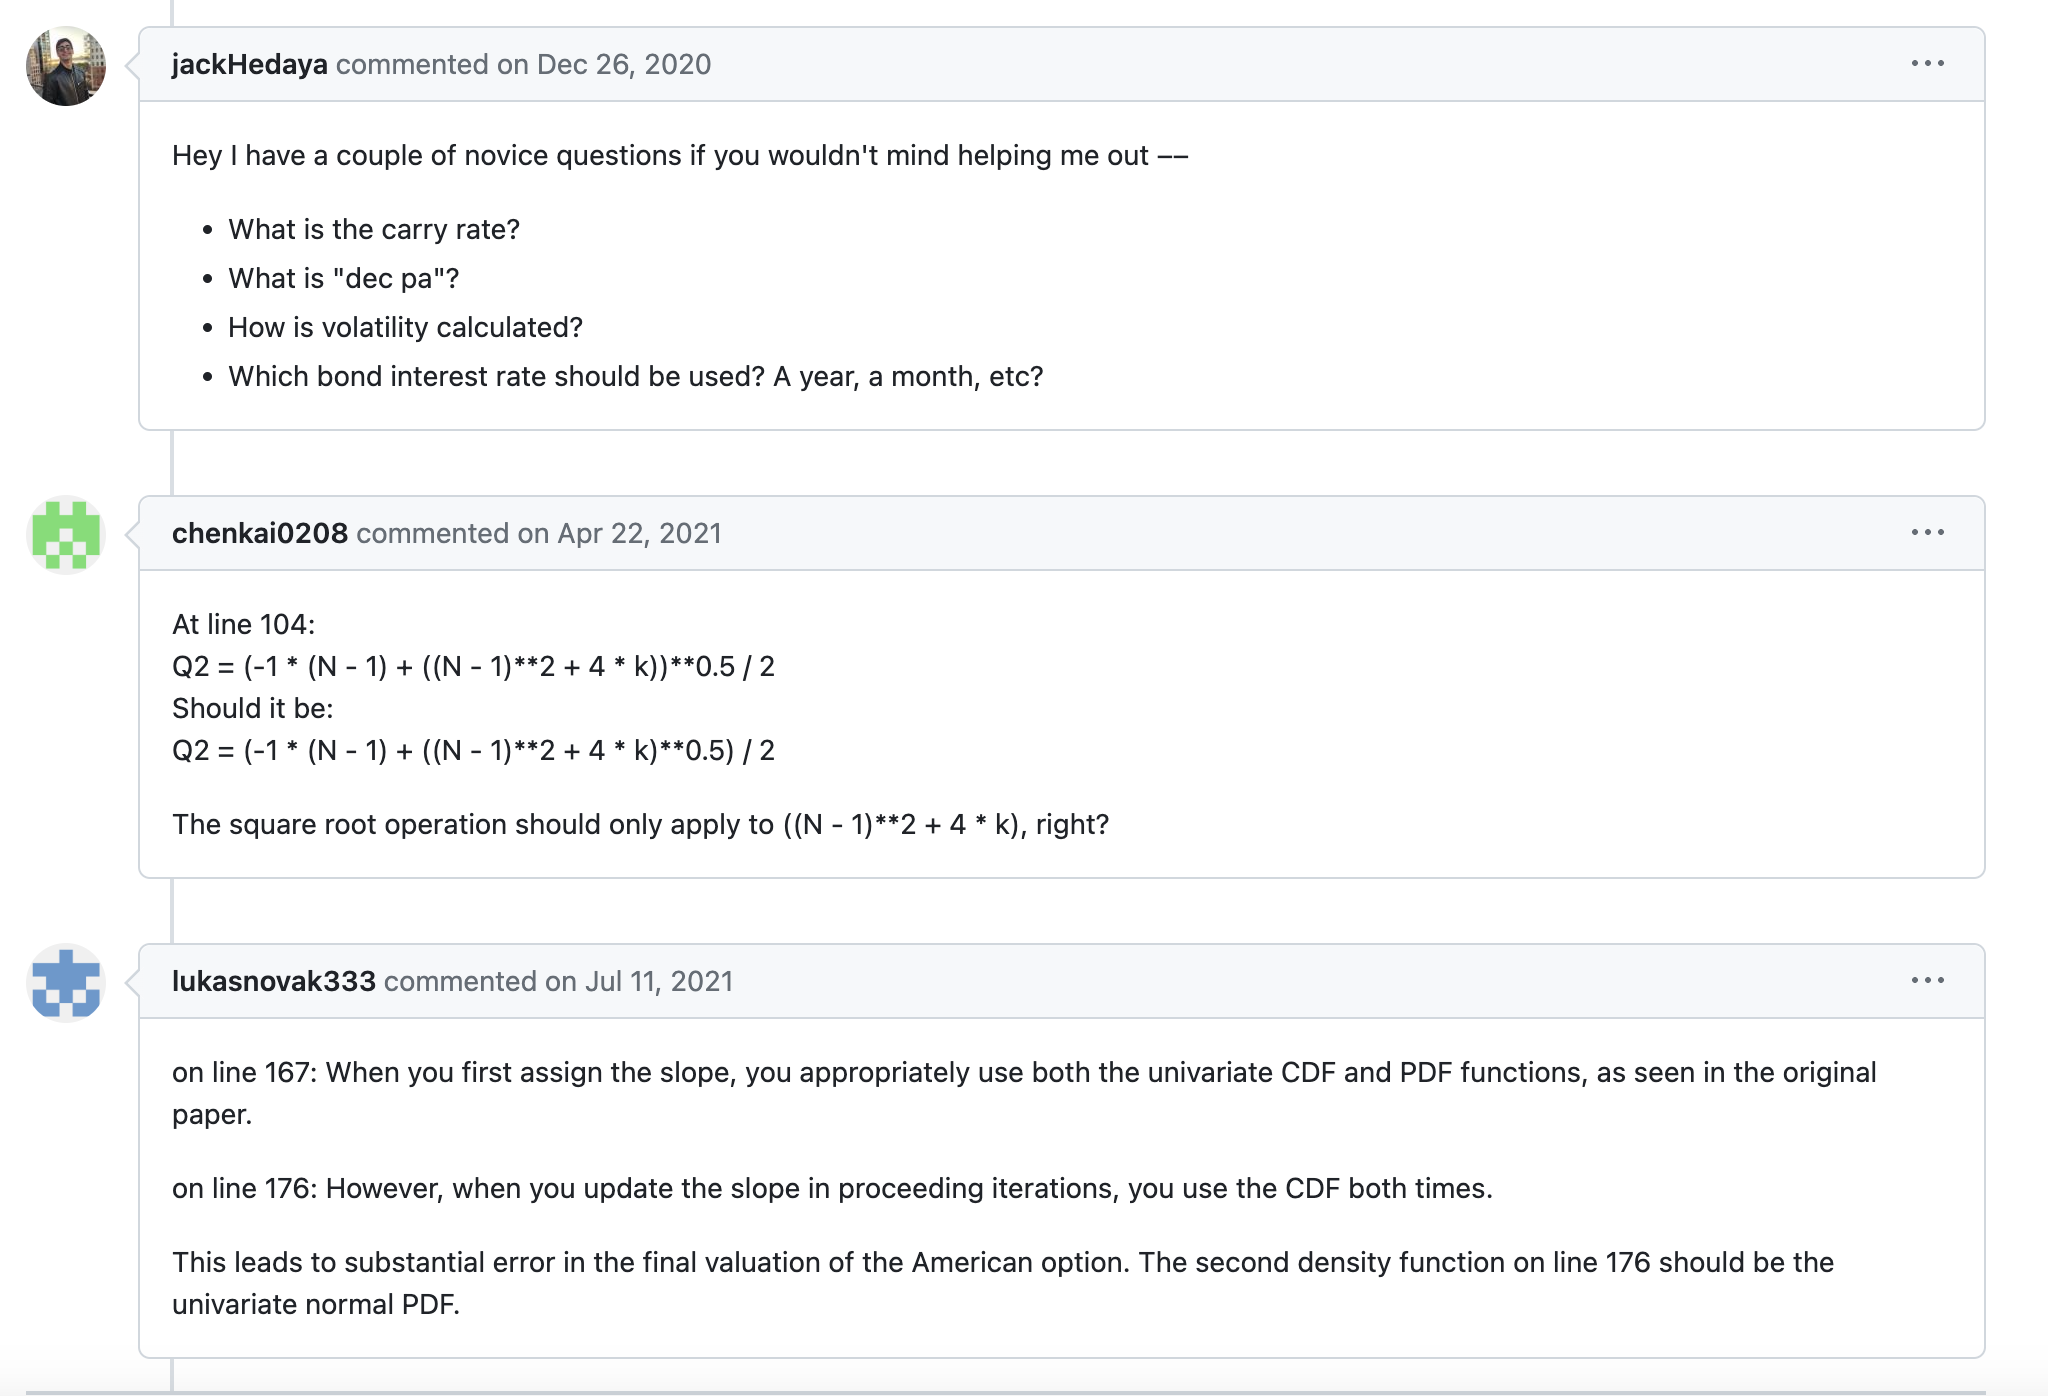

In [ ]:

import math
from  Optimize import solve
import bsm
from scipy import stats,log
class BaroneAdesiWhaley:
    
    def __init__(self,S,X,sigma_sqr,time_sqrt,b,r,nn,m,K,q2):
        
        self.S = S
        self.X = X
        self.sigma_sqr = sigma_sqr
        self.sigma = self.sigma_sqr**2
        self.time_sqrt = time_sqrt
        self.time = self.time_sqrt**2
        self.b = b
        self.r = r
        self.nn = nn
        self.m = m
        self.K = K
        self.q2 = q2
        self.q2_inf = 0.5 * ( (-self.nn-1.0) + math.sqrt(math.pow((self.nn-1),2.0)+4.0*self.m));
        self.S_star_inf = self.X / (1.0 - 1.0/self.q2_inf);
        self.h2 = -(self.b*self.time+2.0*self.sigma*self.time_sqrt)*(self.X/(self.S_star_inf-self.X));
        self.q2_inf = 0.5 * ( (-self.nn-1.0) + math.sqrt(math.pow((self.nn-1),2.0)+4.0*self.m));
        
   
    def approximate_value(self):
       
        euro_call = bsm.blackscholes_price(self.S,self.X,self.time,self.r, self.sigma)
        S_initial = self.X + (self.S_star_inf-self.X)*(1.0 - math.exp(self.h2))
        #self.opt = optimize()
        #self.opt.set_parameters(self.X,self.S_star_inf,self.h2)
        S_star= solve(S_initial,self.X,self.h2)
        if (self.S>=S_star):
            C=self.S - self.X
        else:
            d1 = (log(S_star/self.X)+(self.b+0.5*self.sigma_sqr)*self.time)/(self.sigma*self.time_sqrt)
            A2 =  (1.0-math.exp((self.b-self.r)*self.time))*stats.norm.cdf(d1)* (S_star/self.q2)
            C = euro_call+A2*math.pow((self.S/S_star),self.q2)

        return max(C,euro_call) 
   

    
        
def create_model(S,X,r,b,sigma,time):
    '''
    Instantiates an instance of the class BaroneAdesiWhaley

            Parameters:
                    S (float):       Initial stock price
                    X (float):       Strike price
                    r (float):       risk-free-rate
                    b (float):       dividen yield
                    sigma (float) :  volatility
                    time (float) :   time to maturity in years
           
    '''
    
    sigma_sqr = sigma*sigma
    time_sqrt = math.sqrt(time)
    nn = 2.0*b/sigma_sqr 
    m = 2.0*r/sigma_sqr 
    K = 1.0-math.exp(-r*time)
    q2 = (-(nn-1)+math.sqrt(math.pow((nn-1),2.0)+(4*m/K)))*0.5
     
    return BaroneAdesiWhaley(S,X,sigma_sqr,time_sqrt,b,r,nn,m,K,q2)



mdl = create_model(40,30,0.01,0.02,0.30,1.0)

mdl.approximate_value()


In [ ]:
# bsm.py

from scipy import stats, log, sqrt, exp
import datetime

# defining black scholes formula here with variables


def blackscholes_price(Spot, Strike, TimetoMaturity, riskFreeInterestRate, ImpliedVolatility):
    d1 = (log(Spot/Strike) + (riskFreeInterestRate+ImpliedVolatility *
                              ImpliedVolatility/2)*TimetoMaturity)/(ImpliedVolatility*sqrt(TimetoMaturity))
    d2 = d1 - ImpliedVolatility*sqrt(TimetoMaturity)

    price = Spot*stats.norm.cdf(d1) - Strike * \
        exp(-riskFreeInterestRate*TimetoMaturity)*stats.norm.cdf(d2)

    return price


In [ ]:
# optimize.py
import math
from scipy.optimize import fmin_bfgs



def initial_S_star(X,S_star_inf,h2):
        
   return X + (S_star_inf-X)*(1.0 - math.exp(h2))
       
       
def solve(S_initial,X,h2):
    
   Objective = lambda S_star_inf:(S_initial - initial_S_star(X,S_star_inf,h2))**2
   return fmin_bfgs(Objective, 1, disp = False)[0]
